# Comparing true SFHs with those resolved from best fitting to broadband photometry using Hyperz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('full_subset_good.csv', index_col=0) # The mock galaxy catalogue
df.columns

Index(['z', 't/Gyr', 'M*', 'VIS', 'NISP_Y', 'NISP_J', 'NISP_H', 'LSST_u',
       'LSST_g', 'LSST_r', 'LSST_i', 'LSST_y', 'LSST_z', 'GAIA_Bp', 'GAIA_G',
       'GAIA_Rp', 'des_g', 'des_r', 'des_i', 'des_z', 'galex1500', 'galex2500',
       'MegaCam_u', 'MegaCam_r', 'kids_u', 'kids_g', 'kids_r', 'kids_i',
       'U_JKC', 'B_JKC', 'V_JKC', 'I_JKC', 'JPCam_g', 'PanSTA_i', 'Pan-STA_z',
       'HSC_z', '2MASS_J', '2MASS_H', '2MASS_Ks', 'wircam_Ks', 'M_initial',
       'Z', 'SFH', 'tau/Gyr', 'Av_law', 'Av', 't_l', 'physical'],
      dtype='object')

In [3]:
path = r'/home/chris/Documents/ZPHOT1.3/src/' # Hyperz directory

In [4]:
# the results from Hyperz for three filter choices:
all_zphot = np.loadtxt(path + 'new_ugrizVisYJH_results/ugrizVisYJH_hz.z_phot')

grizVisYJH_zphot = np.loadtxt(path + 'new_grizVisYJH_results/grizVisYJH_hz.z_phot')

VisYJH_zphot = np.loadtxt(path + 'new_VisYJH_results/VisYJH_hz.z_phot')

Since Hyperz doesn't explicitly output the SFH of the best-fitting template, we need to find another way to retrieve this. In column 5, the SpT (Spectral Type) is output. It shows which template was used to provide the lowest $\chi^2$ spectra. Since we know the values of tau in these templates, we can work backwards. 

I define a new list of retrieved tau for three filter choices and find where these match the model input (df). 

The templates are the following:
 - new_mar05_tau1.Z004.salp.ised 
 - new_mar05_tau1.Z002.salp.ised 
 - new_mar05_tau1.Z004.salp.ised 
 - new_mar05_tau01.Z002.salp.ised
 - new_mar05_tau01.Z004.salp.ised
 - new_mar05_tau10.Z002.salp.ised
 - new_mar05_tau10.Z004.salp.ised
 - new_mar05_tau3.Z002.salp.ised 

These are listed 1-8 in the SpT column.

In [5]:
all_tau = np.empty(1013)
for i in range(len(all_zphot)):
    if all_zphot[i, 4] < 4:
        all_tau[i] = 1.
    elif all_zphot[i, 4] > 3 and all_zphot[i, 4] < 6: 
        all_tau[i] = 0.1
    elif all_zphot[i, 4] == 8:
        all_tau[i] = 3
    else:
        all_tau[i] = 10

In [6]:
grizVisYJH_tau = np.empty(1013)
for i in range(len(grizVisYJH_zphot)):
    if grizVisYJH_zphot[i, 4] < 4:
        grizVisYJH_tau[i] = 1.
    elif grizVisYJH_zphot[i, 4] > 3 and grizVisYJH_zphot[i, 4] < 6: 
        grizVisYJH_tau[i] = 0.1
    elif grizVisYJH_zphot[i, 4] == 8:
        grizVisYJH_tau[i] = 3
    else:
        grizVisYJH_tau[i] = 10

In [7]:
VisYJH_tau = np.empty(1013)
for i in range(len(VisYJH_zphot)):
    if VisYJH_zphot[i, 4] < 4:
        VisYJH_tau[i] = 1.
    elif VisYJH_zphot[i, 4] > 3 and VisYJH_zphot[i, 4] < 6: 
        VisYJH_tau[i] = 0.1
    elif VisYJH_zphot[i, 4] == 8:
        VisYJH_tau[i] = 3
    else:
        VisYJH_tau[i] = 10

In [9]:
print('ugriz VIS YJH finds that %.2f percent of SFH are correctly resolved' % (len(np.arange(len(all_tau))[all_tau==df['tau/Gyr']])*100/1013))
print('griz VIS YJH finds that %.2f percent of SFH are correctly resolved' % (len(np.arange(len(grizVisYJH_tau))[grizVisYJH_tau==df['tau/Gyr']])*100/1013))
print('VIS YJH finds that %.2f percent of SFH are correctly resolved' % ( len(np.arange(len(VisYJH_tau))[VisYJH_tau==df['tau/Gyr']])*100/1013))

ugriz VIS YJH finds that 27.05 percent of SFH are correctly resolved
griz VIS YJH finds that 28.23 percent of SFH are correctly resolved
VIS YJH finds that 26.65 percent of SFH are correctly resolved


So we don't actually find much difference here.

It would be valuable to see how the galaxies which did not find solutions varied in properties from those which did. Maybe again it could be seen that extinction is a problem-factor...

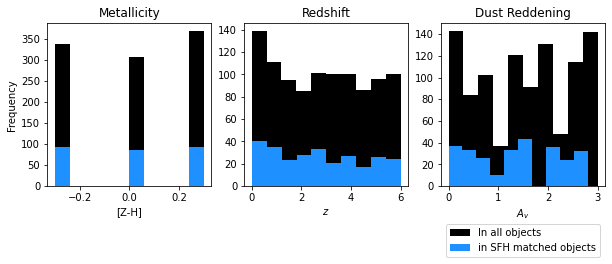

In [123]:
plt.figure(figsize=(10, 3))

plt.subplot(131)
plt.title('Metallicity')
plt.hist(df['Z'], label = 'In all objects', color='k')
plt.hist(df.iloc[np.arange(len(all_tau))[all_tau==df['tau/Gyr']]].Z, label='in SFH matched objects', color='dodgerblue')
plt.ylabel('Frequency')
plt.xlabel('[Z-H]')

ax = plt.gca()
plt.legend(bbox_to_anchor=(3.4, -0.2), bbox_transform=ax.transAxes)

plt.subplot(132)
plt.title('Redshift')
plt.hist(df['z'], color='k')
plt.hist(df.iloc[np.arange(len(all_tau))[all_tau==df['tau/Gyr']]].z, color='dodgerblue')
plt.xlabel('$z$')

plt.subplot(133)
plt.title('Dust Reddening')
plt.hist(df['Av'], color='k')
plt.hist(df.iloc[np.arange(len(all_tau))[all_tau==df['tau/Gyr']]].Av, color='dodgerblue')
plt.xlabel('$A_v$')

#plt.savefig('SFH_match_properties.png', dpi=200, transparent=False, format='png', bbox_inches='tight', pad_inches=0.1)

This wouldn't appear to be the case. Let's explore how the frequency of SFHs compares with the true distribution:

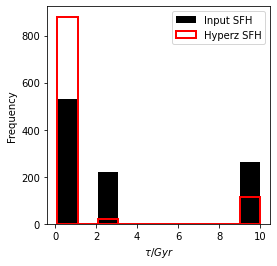

In [122]:
plt.figure(figsize=(4, 4))
plt.hist(df['tau/Gyr'], color='k', alpha=1, label='Input SFH')
plt.hist(all_tau, fill=False, lw=2, edgecolor='r', label='Hyperz SFH')
plt.xlabel(r'$\tau /Gyr$')
plt.ylabel('Frequency')
plt.legend()
#plt.savefig('SFH_in_out.png', dpi=200, transparent=False, format='png', bbox_inches='tight', pad_inches=0.1)

It would appear that $\tau =$ 0.3Gyr is significantly underrepresented in our results, while $\tau =$ 0.1Gyr is severely overrepresented. More galaxy properties may need to be explored here. Maybe age is the problem. 